Necessary Libraries


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gensim
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tahsin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tahsin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tahsin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#plt.style.available
plt.style.use('seaborn-whitegrid')
#plt.colormaps()
WORDCLOUD_COLOR_MAP = 'winter_r'
%matplotlib inline

Reading Data

In [4]:
df = pd.read_csv('Resume/Resume.csv')
df.head()

ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR

Droping unused columns


In [5]:
df.pop('ID')
df.pop('Resume_html')
df.head()

Resume_str Category
0           HR ADMINISTRATOR/MARKETING ASSOCIATE\...       HR
1           HR SPECIALIST, US HR OPERATIONS      ...       HR
2           HR DIRECTOR       Summary      Over 2...       HR
3           HR SPECIALIST       Summary    Dedica...       HR
4           HR MANAGER         Skill Highlights  ...       HR

Preprocessing

Now, we use cleaning process for text analysis.

In [6]:
Stem = nltk.stem.porter.PorterStemmer()

def preprocess(text):
    # Converting all words to lower case
    text = text.lower()
    # Removing numbers, punctuation and non-english characters
    text = re.sub(r'[^a-z]', ' ', text)
    # Tokenizing the text
    text = nltk.tokenize.word_tokenize(text)
    #remove stopwords
    text = [word for word in text if not word in nltk.corpus.stopwords.words('english')]
    # Stemming the words
    text = [Stem.stem(word) for word in text]

    return ' '.join(text)


In [7]:
df['Resume'] = df['Resume_str'].apply(lambda word: preprocess(word))
# droping original column
df.pop('Resume_str')
df

Category                                             Resume
0           HR  hr administr market associ hr administr summar...
1           HR  hr specialist us hr oper summari versatil medi...
2           HR  hr director summari year experi recruit plu ye...
3           HR  hr specialist summari dedic driven dynam year ...
4           HR  hr manag skill highlight hr skill hr depart st...
...        ...                                                ...
2479  AVIATION  rank sgt e non commiss offic charg brigad mail...
2480  AVIATION  govern relat commun organiz develop director p...
2481  AVIATION  geek squad agent profession profil support spe...
2482  AVIATION  program director offic manag summari highli pe...
2483  AVIATION  storekeep ii profession summari purpos documen...

[2484 rows x 2 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2484 non-null   object
 1   Resume    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


In [9]:
# List of all catagories 

categories = np.sort(df['Category'].unique())
categories

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [10]:
# Creating new df_catagories 

df_categories = [df[df['Category'] == category ].loc[:,[ 'Resume', 'Category']] for category in categories]
df_categories[10]


Resume Category
1357  chef career focu nurs student recent obtain cn...     CHEF
1358  chef summari custom orient fast food worker de...     CHEF
1359  chef career overview dedic custom servic repre...     CHEF
1360  chef summari experienc cater chef skill prepar...     CHEF
1361  rm roxann mejia summari motiv chef compet keep...     CHEF
...                                                 ...      ...
1470  owner chef summari chef year critic acclaim wo...     CHEF
1471  kindergarten teacher profession summari energe...     CHEF
1472  substitut para profession summari profession m...     CHEF
1473  execut chef partner summari proven abil fine d...     CHEF
1474  line chef expedit summari chef year experi coo...     CHEF

[118 rows x 2 columns]

Bar Chart

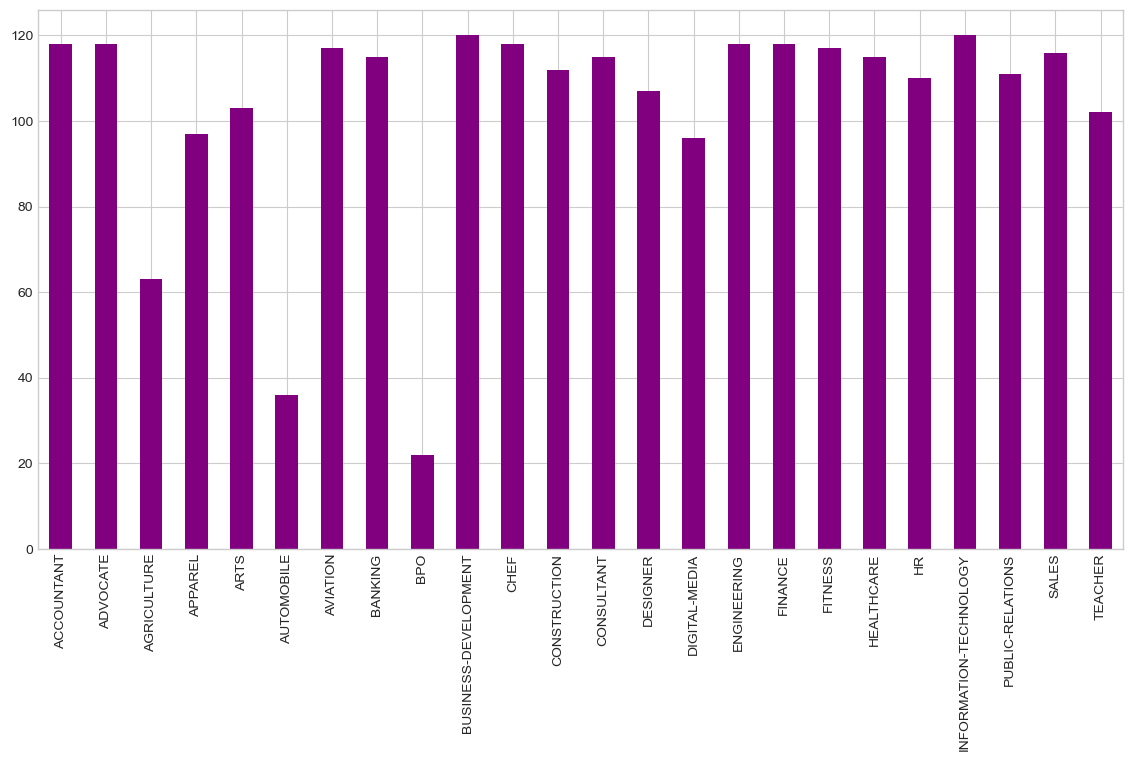

In [15]:
df['Category'].value_counts().sort_index().plot(kind= 'bar', figsize=(14, 7), color='purple')
plt.show()

Pie Chart

<function matplotlib.pyplot.show(close=None, block=None)>

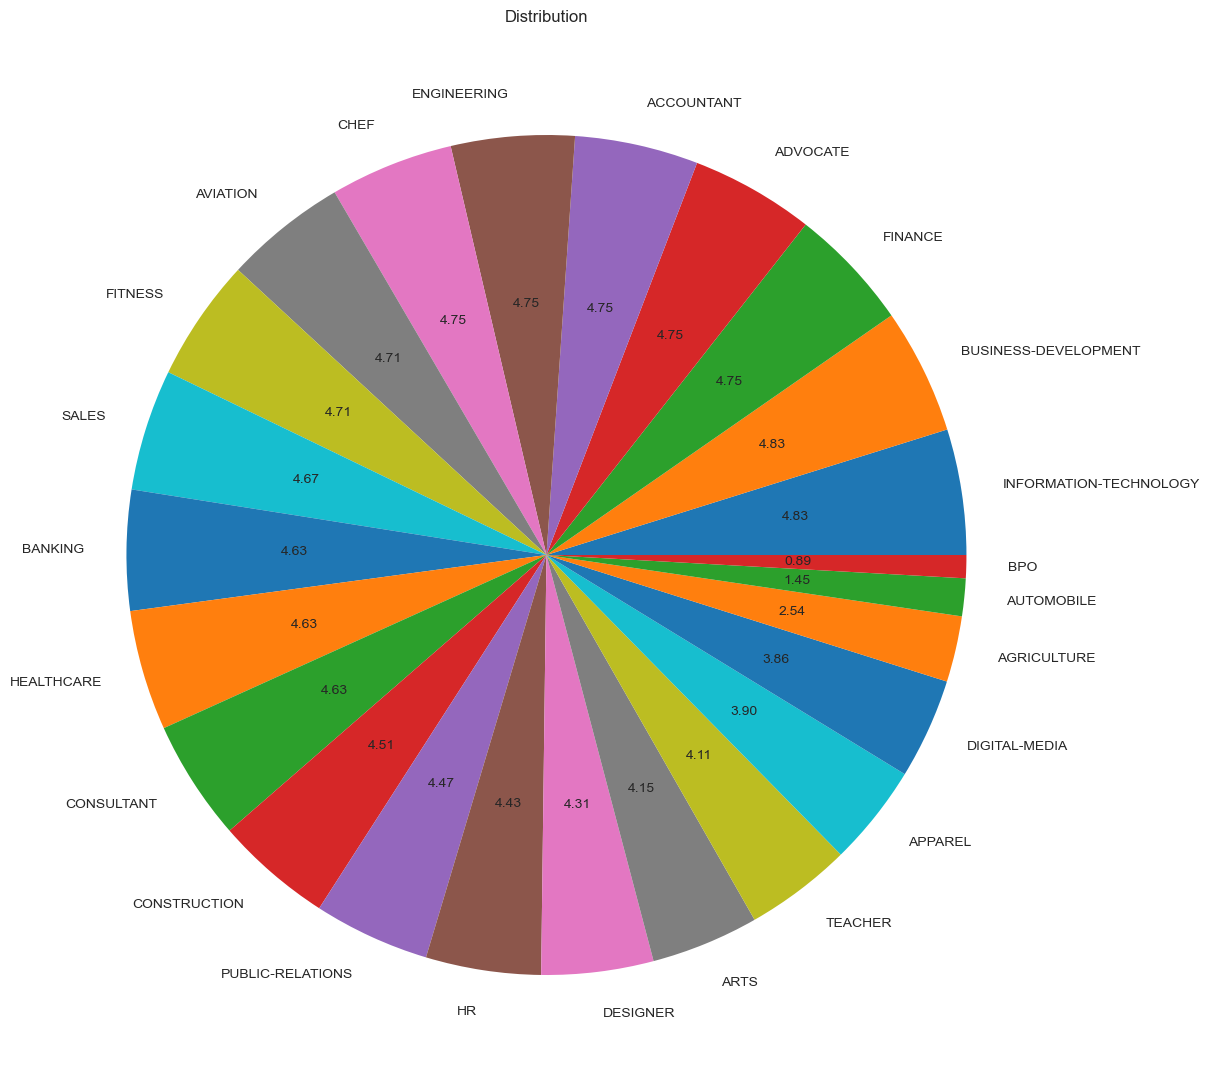

In [43]:
from matplotlib.gridspec import GridSpec

count = df['Category'].value_counts()
label = df['Category'].value_counts().keys()

plt.figure(1, figsize=(30,30))
grid= GridSpec(2,2)
cmap = plt.get_cmap('brg')
color = [cmap(i) for i in np.linspace(1,2,5)]
plt.subplot(grid[0,1], aspect = 1, title = 'Distribution')

pie = plt.pie(count, labels= label, autopct= '%1.2f')
plt.show

Word Cloud

In [24]:
def wordcloud(df):
    text = ' '.join(text for text in df['Resume'])
    
    wordcloud = WordCloud(height= 2500 , width= 5000, colormap= WORDCLOUD_COLOR_MAP ).generate(text)
    return wordcloud

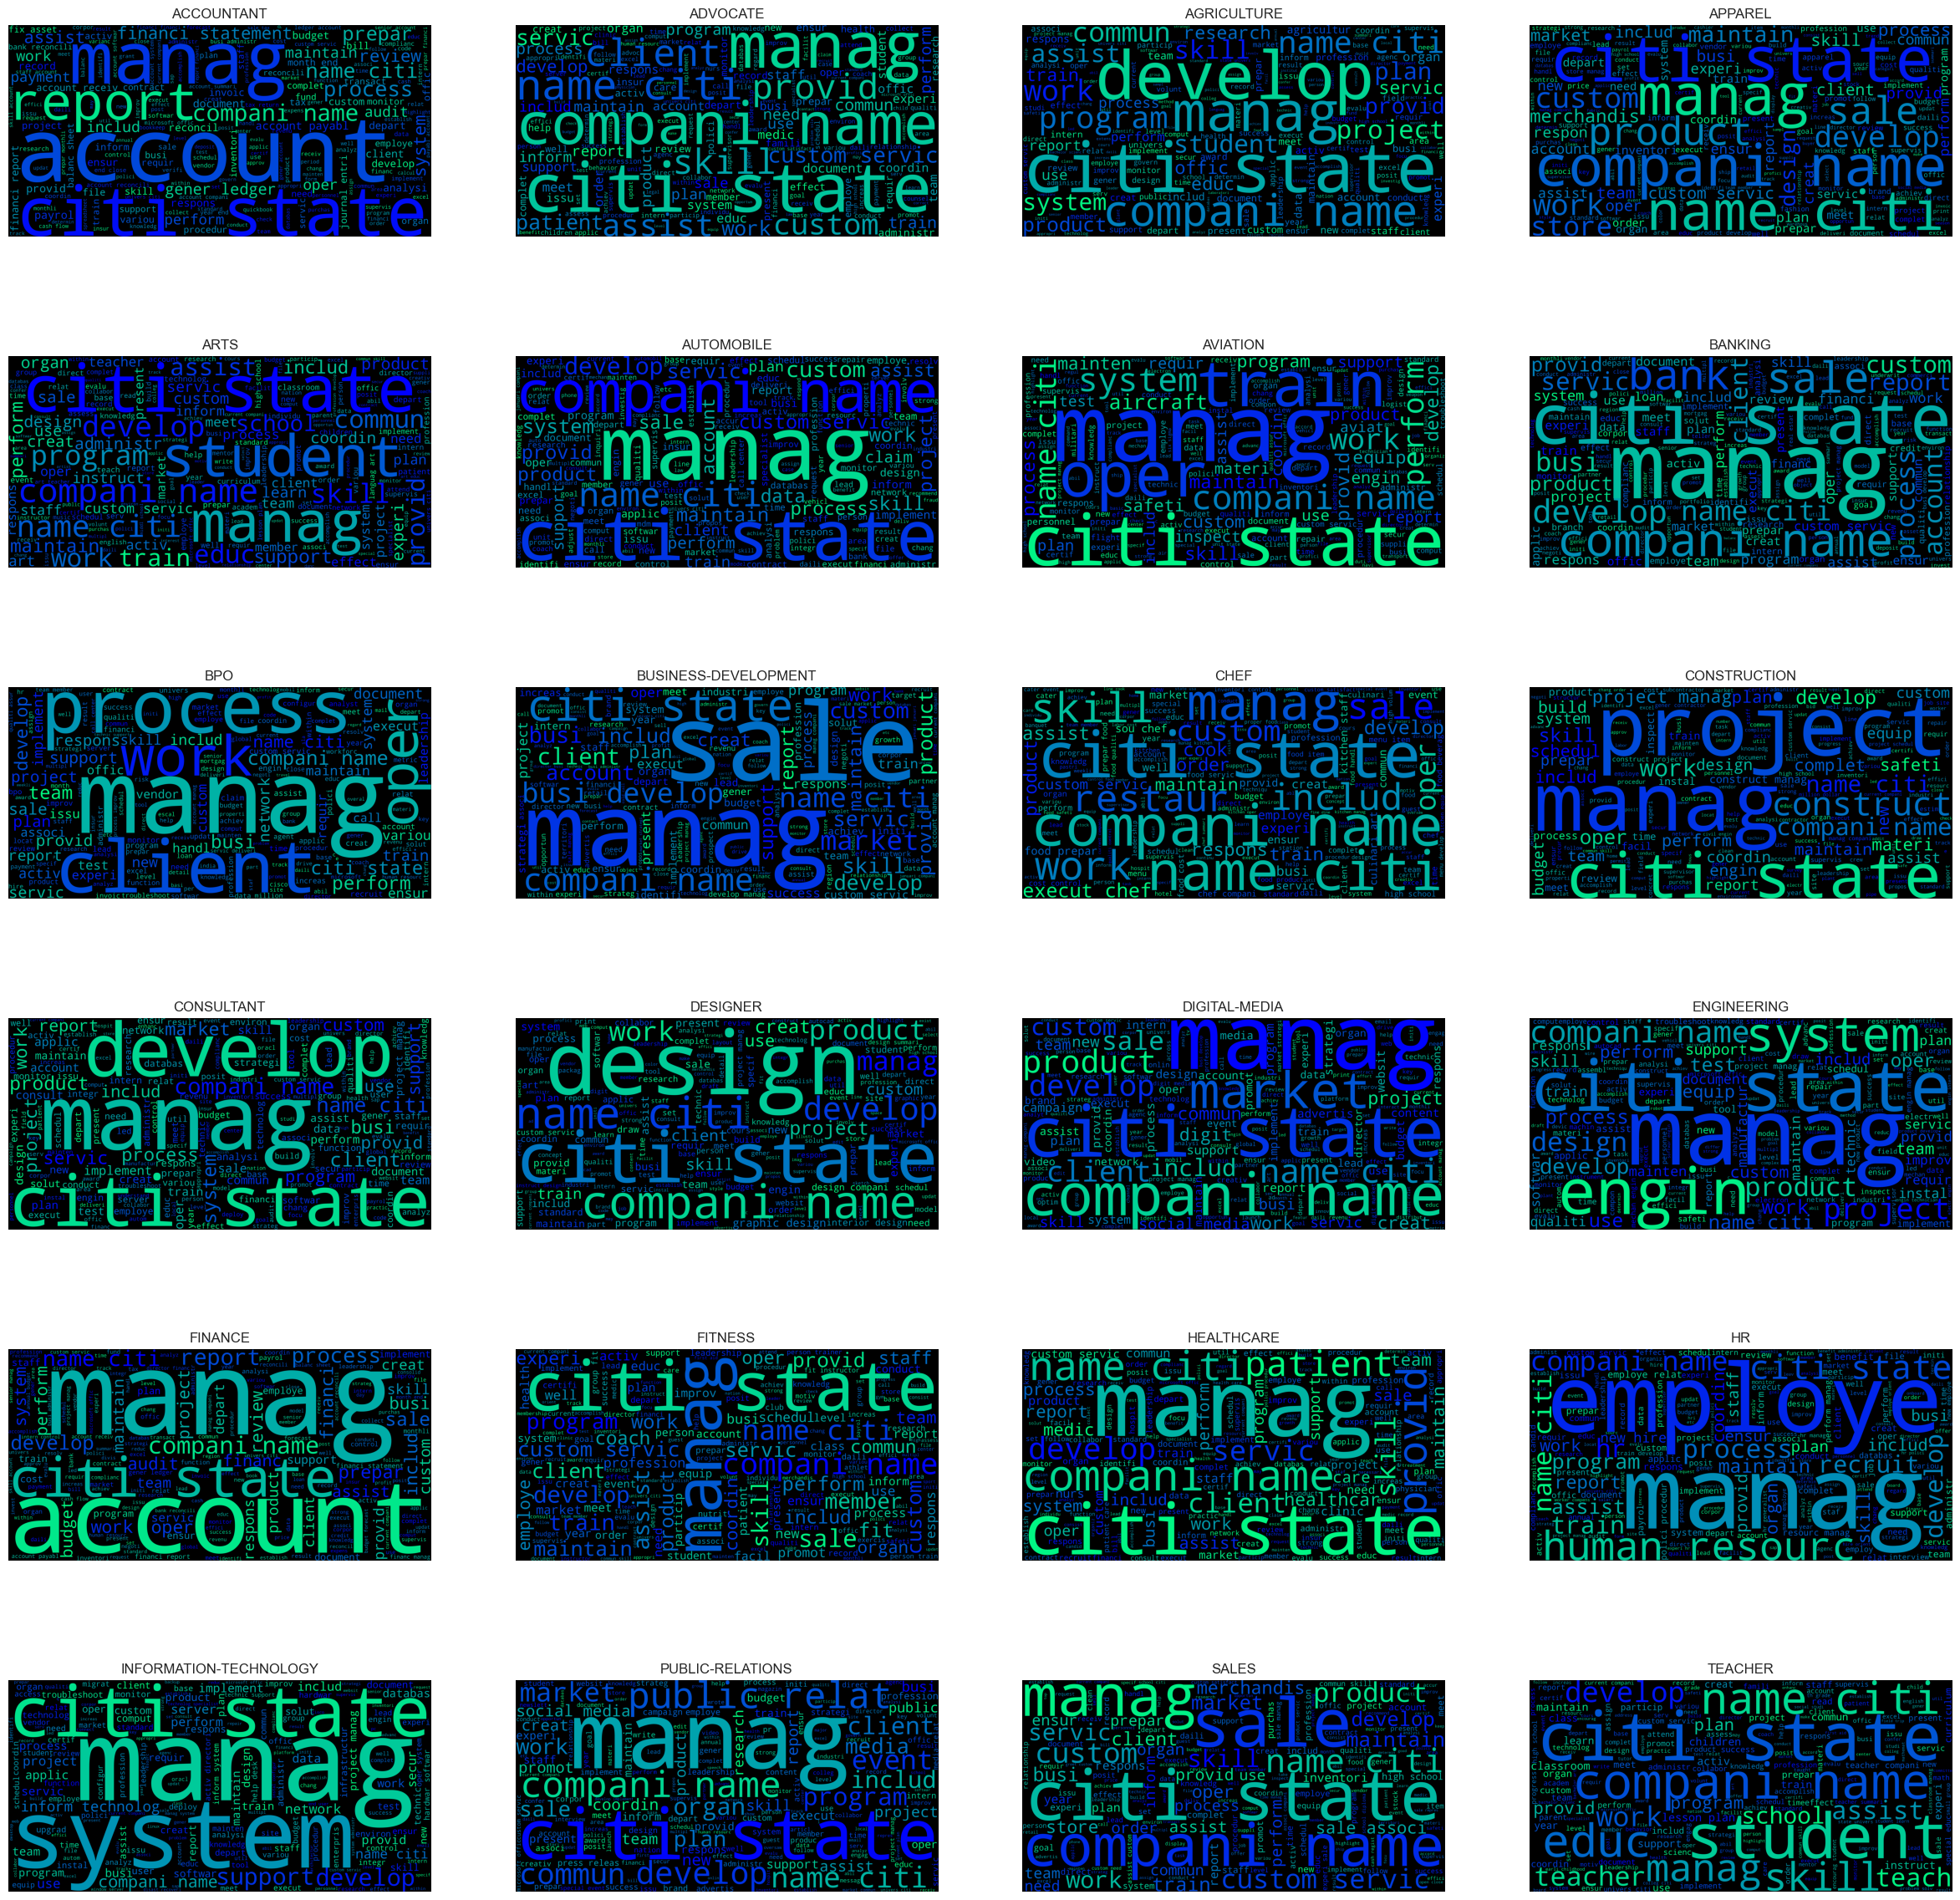

In [70]:
plt.figure(figsize=(30,30))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(6, 4, i+1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()


Word Frequency Table

In [29]:
def wordfq(df):
    count = df['Resume'].str.split(expand = True).stack().value_counts().reset_index()
    count_columns = ['Word', 'Frequency']
    count.columns = count_columns

    return count.head(10)



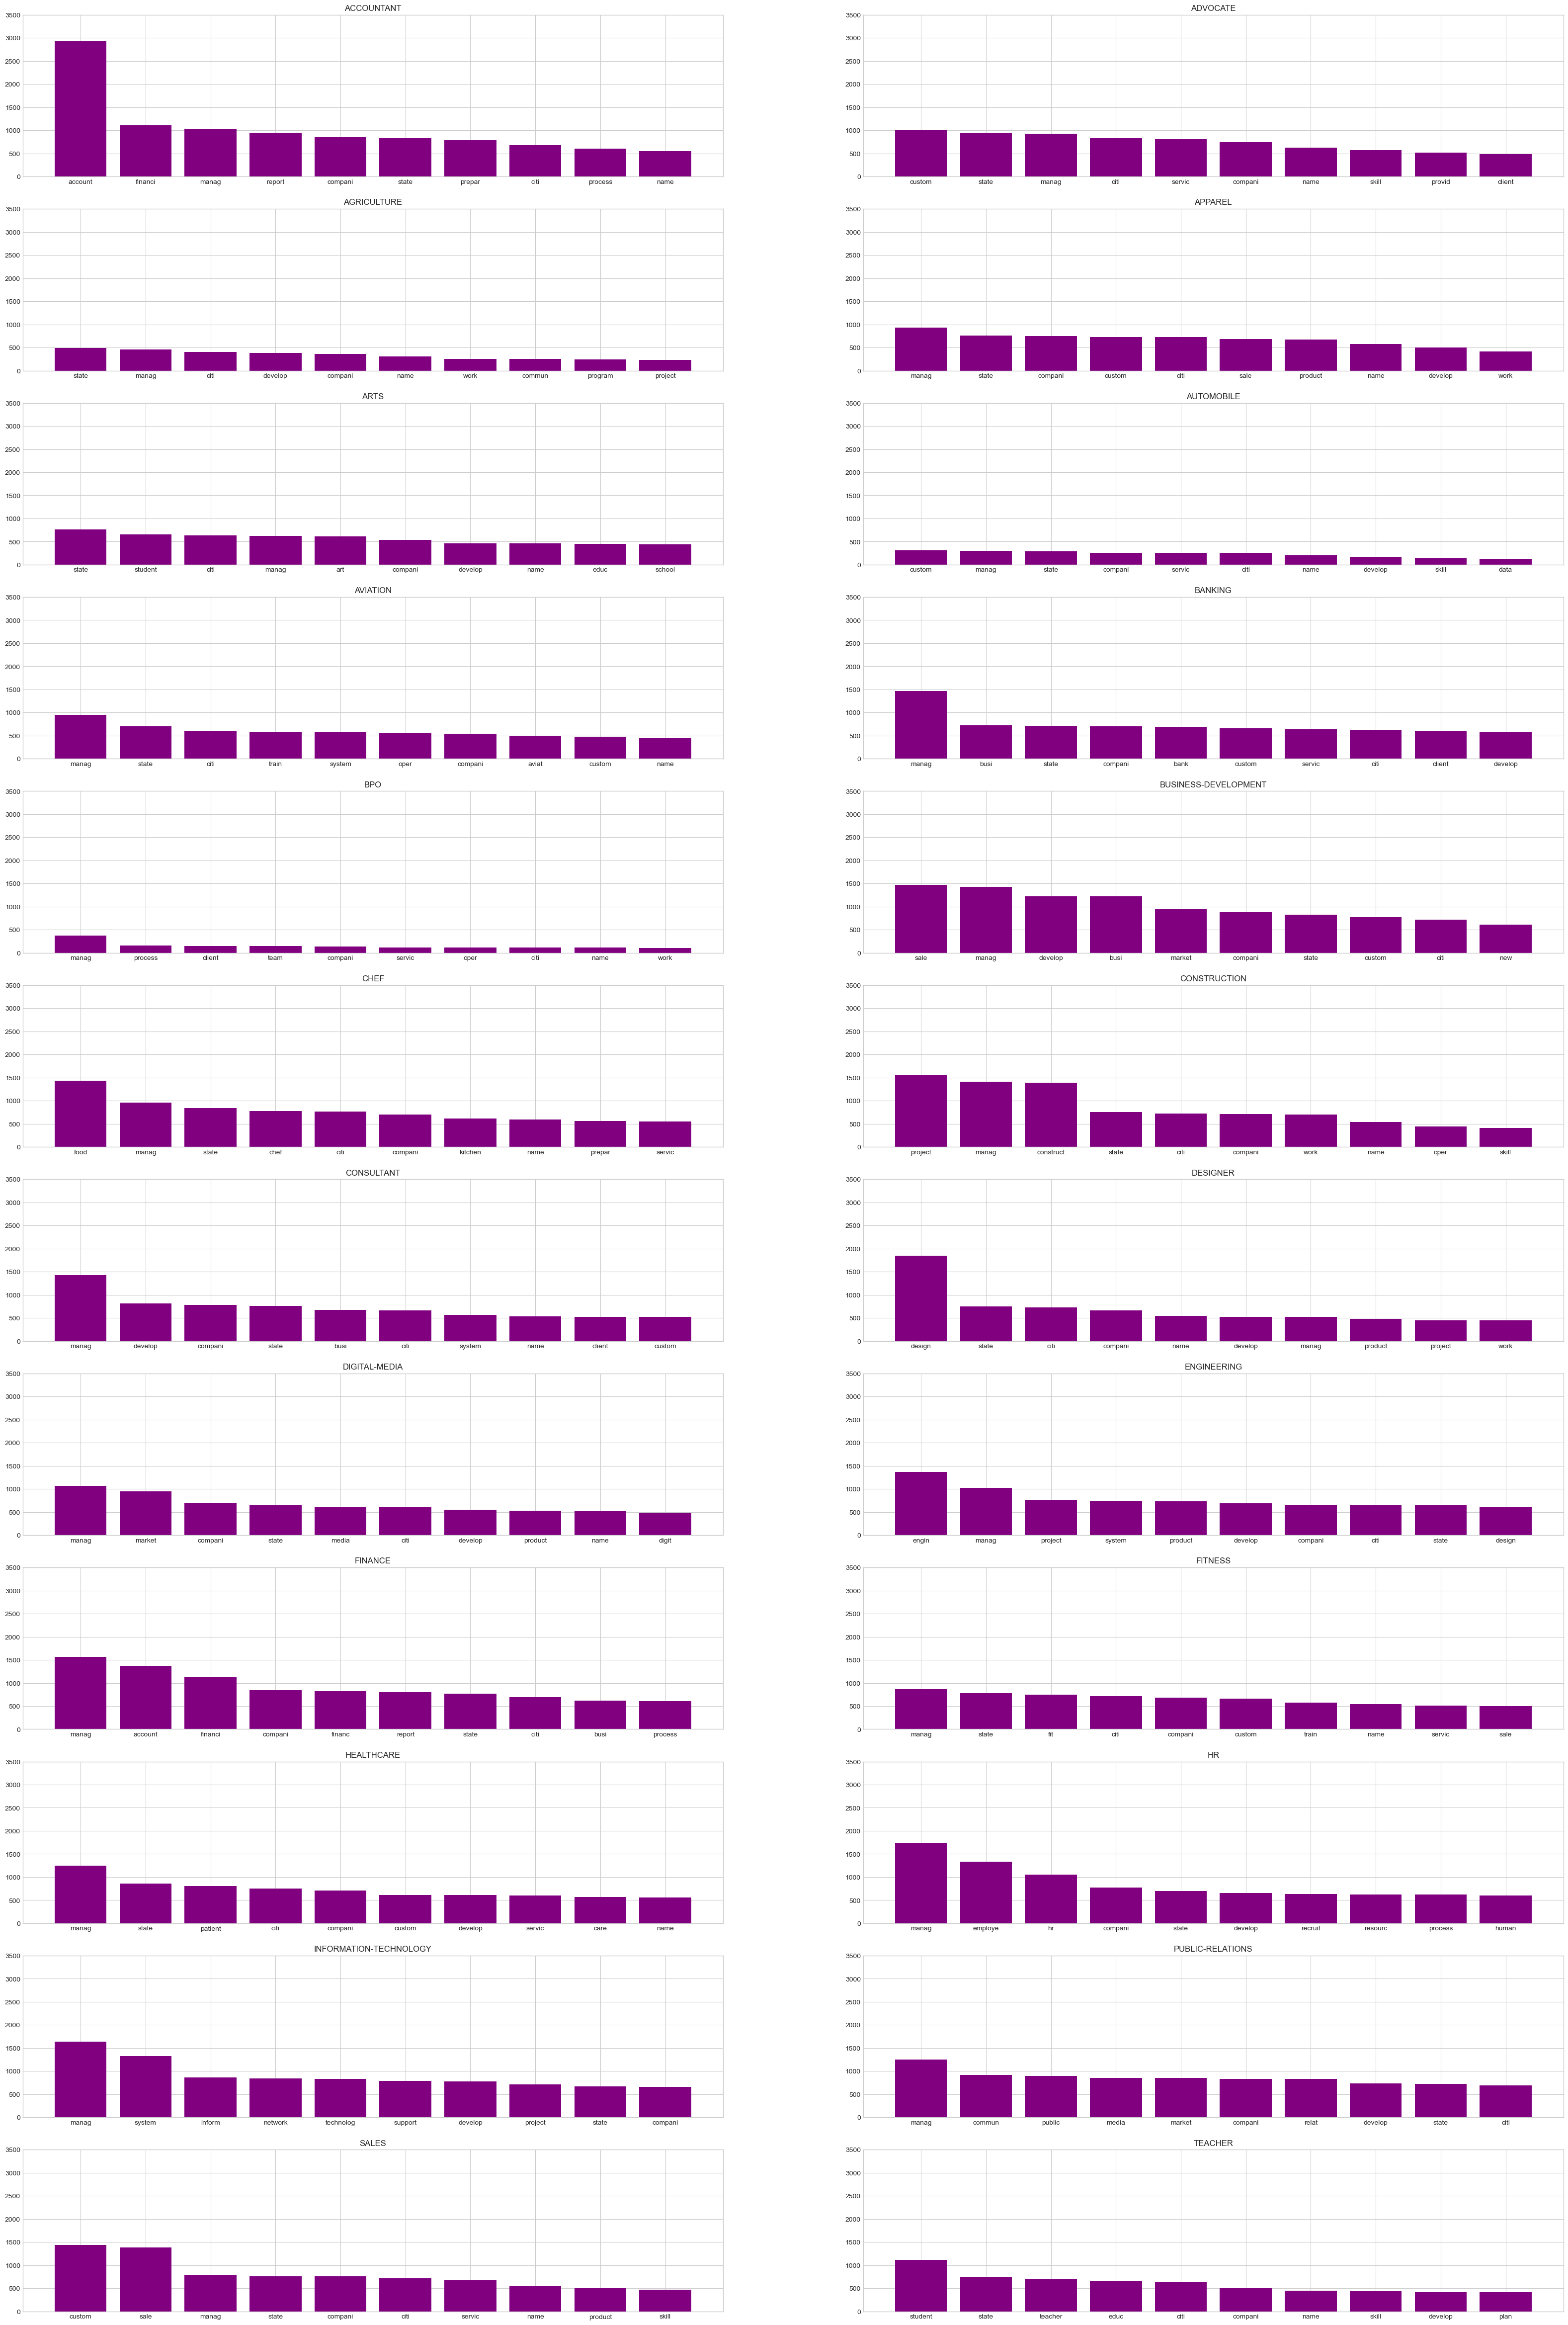

In [32]:
fig = plt.figure(figsize=(40, 60))

for i, category in enumerate(np.sort(df['Category'].unique())):
    wf = wordfq(df_categories[i])

    fig.add_subplot(12, 2, i+1)
    plt.title(category)
    plt.bar(wf['Word'], wf['Frequency'], color = 'purple')
    plt.ylim(0, 3500)

plt.show()
plt.close()

Data Cleaning

In [40]:
# defining Stopwords
stop_words = stopwords.words('english')

In [41]:
#function that stop words and the words less than 2 characters

def stop_words_remove(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words: result.append(token)   
    
    return result


In [46]:
df['Clean'] = df['Resume'].apply(stop_words_remove).astype(str)
df['Clean']

0       ['administr', 'market', 'associ', 'administr',...
1       ['specialist', 'oper', 'summari', 'versatil', ...
2       ['director', 'summari', 'year', 'experi', 'rec...
3       ['specialist', 'summari', 'dedic', 'driven', '...
4       ['manag', 'skill', 'highlight', 'skill', 'depa...
                              ...                        
2479    ['rank', 'commiss', 'offic', 'charg', 'brigad'...
2480    ['govern', 'relat', 'commun', 'organiz', 'deve...
2481    ['geek', 'squad', 'agent', 'profession', 'prof...
2482    ['program', 'director', 'offic', 'manag', 'sum...
2483    ['storekeep', 'profession', 'summari', 'purpos...
Name: Clean, Length: 2484, dtype: object

In [47]:
df

Category                                             Resume  \
0           HR  hr administr market associ hr administr summar...   
1           HR  hr specialist us hr oper summari versatil medi...   
2           HR  hr director summari year experi recruit plu ye...   
3           HR  hr specialist summari dedic driven dynam year ...   
4           HR  hr manag skill highlight hr skill hr depart st...   
...        ...                                                ...   
2479  AVIATION  rank sgt e non commiss offic charg brigad mail...   
2480  AVIATION  govern relat commun organiz develop director p...   
2481  AVIATION  geek squad agent profession profil support spe...   
2482  AVIATION  program director offic manag summari highli pe...   
2483  AVIATION  storekeep ii profession summari purpos documen...   

                                                  Clean  
0     ['administr', 'market', 'associ', 'administr',...  
1     ['specialist', 'oper', 'summari', 'versatil', ...  
2     ['director', 'summari', 'year', 'experi', 'rec...  
3     ['specialist', 'summari', 'dedic', 'driven', '...  
4     ['manag', 'skill', 'highlight', 'skill', 'depa...  
...                                                 ...  
2479  ['rank', 'commiss', 'offic', 'charg', 'brigad'...  
2480  ['govern', 'relat', 'commun', 'organiz', 'deve...  
2481  ['geek', 'squad', 'agent', 'profession', 'prof...  
2482  ['program', 'director', 'offic', 'manag', 'sum...  
2483  ['storekeep', 'profession', 'summari', 'purpos...  

[2484 rows x 3 columns]

In [68]:
# spliting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(df['Clean'], df['Category'], test_size = 0.2)

In [69]:
# data vectorization

vr = CountVectorizer()
vr_train = vr.fit_transform(X_train).astype('float32')
vr_test = vr.transform(X_test).astype('float32')

Model building and training

In [70]:
import joblib

model = GradientBoostingClassifier(random_state=42, max_features= 'auto', n_estimators=500, max_depth = 5, criterion='squared_error')
model.fit(vr_train, Y_train)

# Saving trained model and vectorizer

joblib.dump(model, 'trained_model.pkl') 
joblib.dump(vr_train, 'vectorizer.pkl')   




['vectorizer.pkl']

In [71]:
pred = model.predict(vr_test)
pred

array(['BUSINESS-DEVELOPMENT', 'ARTS', 'DIGITAL-MEDIA', 'ACCOUNTANT',
       'CONSTRUCTION', 'ACCOUNTANT', 'BANKING', 'FITNESS', 'DESIGNER',
       'PUBLIC-RELATIONS', 'ENGINEERING', 'HEALTHCARE', 'DESIGNER',
       'TEACHER', 'HEALTHCARE', 'ENGINEERING', 'BANKING', 'TEACHER',
       'DIGITAL-MEDIA', 'ENGINEERING', 'TEACHER', 'DIGITAL-MEDIA', 'HR',
       'BANKING', 'PUBLIC-RELATIONS', 'SALES', 'DESIGNER', 'ACCOUNTANT',
       'APPAREL', 'DESIGNER', 'CONSTRUCTION', 'BANKING', 'TEACHER',
       'CONSTRUCTION', 'CONSTRUCTION', 'ADVOCATE', 'DIGITAL-MEDIA',
       'AVIATION', 'BANKING', 'FINANCE', 'PUBLIC-RELATIONS', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'AVIATION', 'PUBLIC-RELATIONS', 'FITNESS',
       'FITNESS', 'INFORMATION-TECHNOLOGY', 'CONSTRUCTION',
       'BUSINESS-DEVELOPMENT', 'ARTS', 'ARTS', 'BUSINESS-DEVELOPMENT',
       'DIGITAL-MEDIA', 'ENGINEERING', 'PUBLIC-RELATIONS', 'ARTS',
       'SALES', 'ARTS', 'TEACHER', 'DIGITAL-MEDIA', 'CHEF', 'SALES',
       'ENGINEERING', 'BUS

In [72]:
print("training Score: {:.2f}".format(model.score(vr_train, Y_train)))
print("test Score: {:.2f}".format(model.score(vr_test, Y_test)))

training Score: 1.00
test Score: 0.63


In [75]:
print("model report: %s: \n %s\n" % (model, metrics.classification_report(Y_test, pred)))

model report: GradientBoostingClassifier(criterion='squared_error', max_depth=5,
                           max_features='auto', n_estimators=500,
                           random_state=42): 
                         precision    recall  f1-score   support

            ACCOUNTANT       0.81      0.88      0.84        24
              ADVOCATE       0.81      0.65      0.72        20
           AGRICULTURE       0.56      0.38      0.45        13
               APPAREL       0.80      0.42      0.55        19
                  ARTS       0.20      0.53      0.29        15
            AUTOMOBILE       0.50      0.10      0.17        10
              AVIATION       0.82      0.67      0.74        21
               BANKING       0.54      0.61      0.57        23
                   BPO       0.00      0.00      0.00         8
  BUSINESS-DEVELOPMENT       0.50      0.39      0.44        31
                  CHEF       0.94      0.94      0.94        16
          CONSTRUCTION       0.72    

e:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
